In [1]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
data.data.shape

(569, 30)

In [5]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
data.target.shape

(569,)

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data.data,  data.target, test_size=0.33)
N, D = x_train.shape

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [12]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [13]:
epochs = 1000

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for i in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    train_acc = np.mean(np.round(outputs.detach().numpy()) == y_train.numpy())
    
    loss.backward()
    optimizer.step()
    
    output_test = model(x_test)
    loss_test = criterion(output_test, y_test)
    test_acc = np.mean(np.round(output_test.detach().numpy()) == y_test.numpy())
    
    train_losses.append(loss.item())
    test_losses.append(loss_test.item())
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    if(i + 1) % 50 == 0:
        print(f"Epoch {i + 1}/{epochs}, train_loss: {loss.item():.4f}, test_loss: {loss_test.item():.4f}")

Epoch 50/1000, train_loss: 0.5017, test_loss: 0.4800
Epoch 100/1000, train_loss: 0.3782, test_loss: 0.3534
Epoch 150/1000, train_loss: 0.3086, test_loss: 0.2854
Epoch 200/1000, train_loss: 0.2632, test_loss: 0.2422


Epoch 250/1000, train_loss: 0.2313, test_loss: 0.2121
Epoch 300/1000, train_loss: 0.2076, test_loss: 0.1899
Epoch 350/1000, train_loss: 0.1893, test_loss: 0.1729
Epoch 400/1000, train_loss: 0.1747, test_loss: 0.1595
Epoch 450/1000, train_loss: 0.1629, test_loss: 0.1487
Epoch 500/1000, train_loss: 0.1530, test_loss: 0.1397
Epoch 550/1000, train_loss: 0.1447, test_loss: 0.1322
Epoch 600/1000, train_loss: 0.1376, test_loss: 0.1259
Epoch 650/1000, train_loss: 0.1314, test_loss: 0.1204
Epoch 700/1000, train_loss: 0.1260, test_loss: 0.1157
Epoch 750/1000, train_loss: 0.1213, test_loss: 0.1115
Epoch 800/1000, train_loss: 0.1170, test_loss: 0.1079
Epoch 850/1000, train_loss: 0.1132, test_loss: 0.1046
Epoch 900/1000, train_loss: 0.1097, test_loss: 0.1017
Epoch 950/1000, train_loss: 0.1066, test_loss: 0.0991
Epoch 1000/1000, train_loss: 0.1037, test_loss: 0.0968


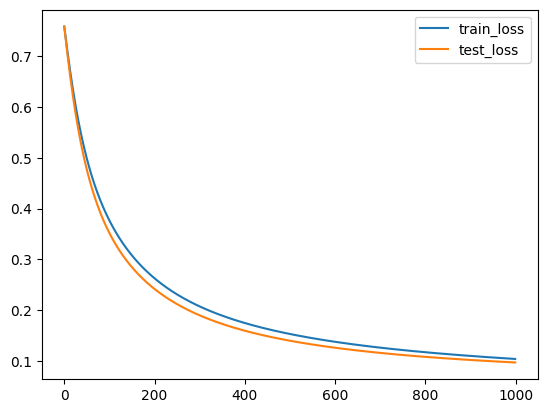

In [14]:
plt.plot(train_losses, label="train_loss")
plt.plot(test_losses, label="test_loss")
plt.legend()
plt.show()

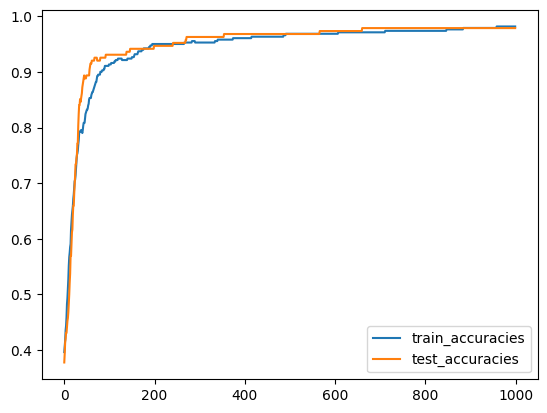

In [15]:
plt.plot(train_accuracies, label="train_accuracies")
plt.plot(test_accuracies, label="test_accuracies")
plt.legend()
plt.show()

In [16]:
with torch.no_grad():
    p_train = model(x_train).numpy()
    p_train = np.round(p_train)
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(x_test).numpy()
    p_test = np.round(p_test)
    test_acc = np.mean(y_test.numpy() == p_test)
    
print(f"train_acc: {train_acc:.4f}, test_acc: {test_acc:.4f}")

train_acc: 0.9816, test_acc: 0.9787
